Converged after 25 iterations.
Final SSE: 2592.4898


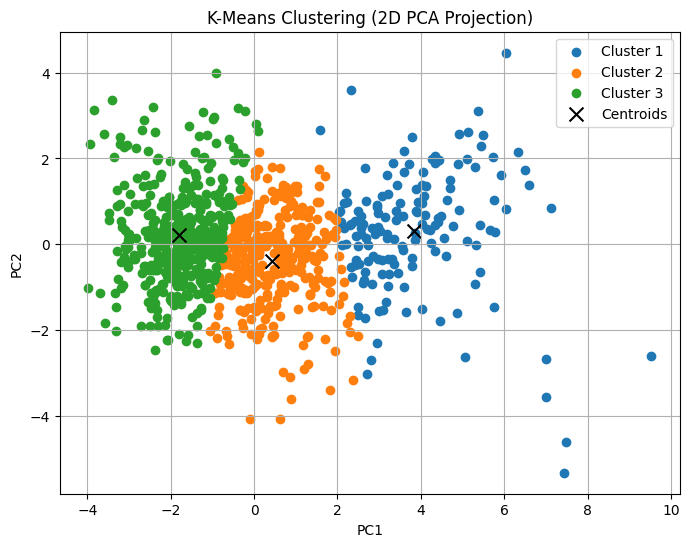

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_excel("/content/sample_data/Raisin_Dataset.xlsx")
features = ['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
            'ConvexArea', 'Extent', 'Perimeter']
X = df[features].values

# Standardize features (optional but recommended)
X = (X - X.mean(axis=0)) / X.std(axis=0)

# K-Means Parameters
k = 3
n_samples, n_features = X.shape

# Step 1: Randomly initialize k centroids
np.random.seed(42)
centroids = X[np.random.choice(n_samples, k, replace=False)]

def euclidean(a, b):
    return np.sqrt(np.sum((a - b)**2))

def assign_clusters(X, centroids):
    clusters = []
    for x in X:
        distances = [euclidean(x, centroid) for centroid in centroids]
        cluster = np.argmin(distances)
        clusters.append(cluster)
    return np.array(clusters)

def update_centroids(X, clusters, k):
    new_centroids = []
    for i in range(k):
        cluster_points = X[clusters == i]
        new_centroids.append(np.mean(cluster_points, axis=0))
    return np.array(new_centroids)

# K-Means Loop
max_iters = 100
for iteration in range(max_iters):
    clusters = assign_clusters(X, centroids)
    new_centroids = update_centroids(X, clusters, k)

    # Convergence check
    if np.allclose(centroids, new_centroids):
        print(f"Converged after {iteration+1} iterations.")
        break
    centroids = new_centroids

# SSE (Sum of Squared Errors)
sse = 0
for i in range(k):
    points = X[clusters == i]
    sse += np.sum((points - centroids[i])**2)

print(f"Final SSE: {sse:.4f}")

# Visualize in 2D using PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)
centroids_2d = pca.transform(centroids)

plt.figure(figsize=(8, 6))
for i in range(k):
    plt.scatter(X_2d[clusters == i, 0], X_2d[clusters == i, 1], label=f"Cluster {i+1}")
plt.scatter(centroids_2d[:, 0], centroids_2d[:, 1], color='black', marker='x', s=100, label="Centroids")
plt.title("K-Means Clustering (2D PCA Projection)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.grid(True)
plt.show()
